In [78]:
import pandas as pd

In [84]:
df = pd.read_csv("scripts_enamine/results/data_13.csv")
df_orig = pd.DataFrame(df)

In [80]:
import numpy as np
cols = [
 'IC50Pred',
 'HighClassifier',
 'WhalesDist3Act',
 'ActivityClfGraph',
 'ActivityRegGraph',
 'ActivityClfVocab',
 'ActivityRegVocab',
 'ActivityIcVocab'
]

TARGET = 'prob_success'

cols += [TARGET]

9it [00:00, 12.45it/s]


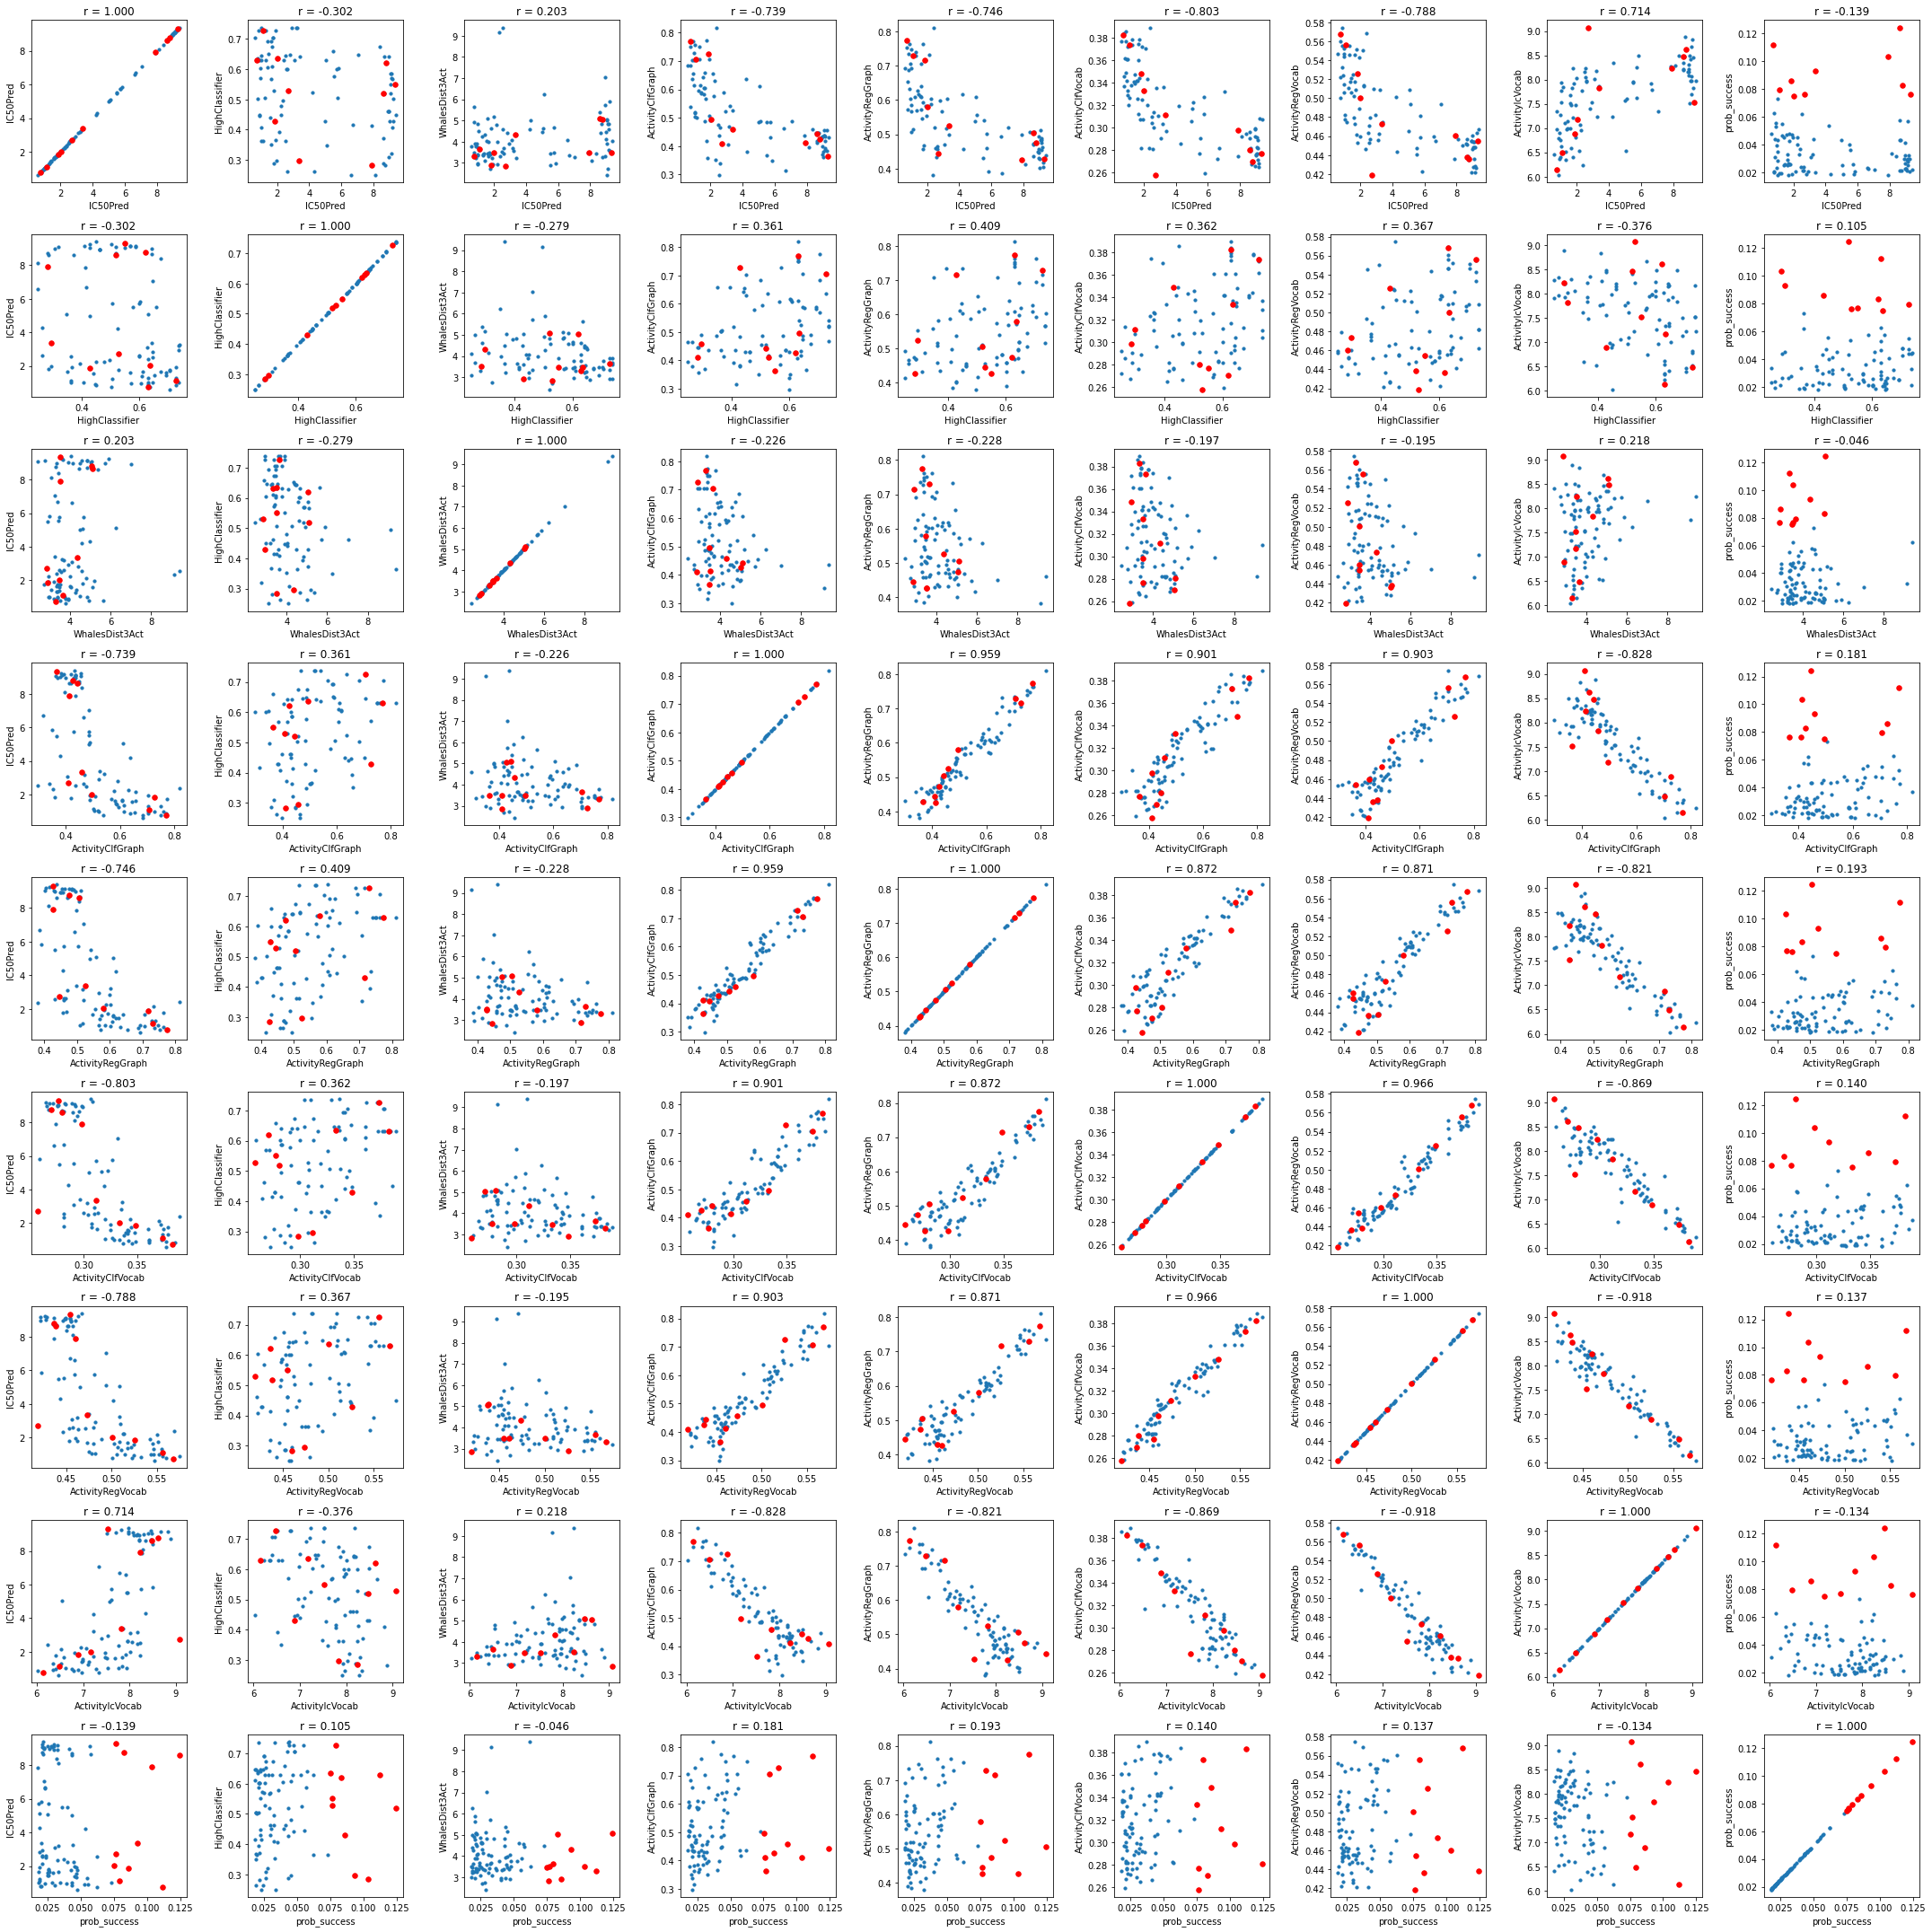

In [81]:
from scipy.stats import spearmanr
from tqdm import tqdm
fig, axs = plt.subplots(9, 9, figsize=(30,30))

for i, c in tqdm(enumerate(cols)):
    c_i = c
    for j in range(len(cols)):
        c_j = cols[j]
        ax = axs[i, j]
        x = df[c_i]
        y = df[c_j]
        r = spearmanr(x,y)
        ax.scatter(x, y, s=10)
        ax.scatter(x[:10], y[:10], color="red", s=30)
        ax.set_xlabel(c_i)
        ax.set_ylabel(c_j)
        ax.set_title("r = %.3f" % r[0])

plt.tight_layout()
plt.savefig("scores_correlation_evariste.png", dpi=300)

In [95]:
ALPHA = 50

df = pd.DataFrame(df_orig)

ic_p = np.percentile(df["IC50Pred"], 100-ALPHA)
hc_p = np.percentile(df["HighClassifier"], ALPHA)
wh_p = np.percentile(df["WhalesDist3Act"], 100-ALPHA)
cg_p = np.percentile(df["ActivityClfGraph"], ALPHA)
rg_p = np.percentile(df["ActivityRegGraph"], ALPHA)
cv_p = np.percentile(df["ActivityClfVocab"], ALPHA)
rv_p = np.percentile(df["ActivityRegVocab"], ALPHA)
iv_p = np.percentile(df["ActivityIcVocab"], 100-ALPHA)


df = df[
    #(df["IC50Pred"] < ic_p) &
    (df["IC50Pred"] < 4) &
    (df["HighClassifier"] > hc_p) &
    (df["WhalesDist3Act"] < wh_p) &
    (df["ActivityClfGraph"] > cg_p) &
    (df["ActivityRegGraph"] > rg_p) &
    (df["ActivityClfVocab"] > cv_p) &
    (df["ActivityRegVocab"] > rv_p) &
    (df["ActivityIcVocab"] < iv_p)
]

In [96]:
df

,Unnamed: 0,Smiles,potency_mu,potency_sigma,LogD_mu,LogD_sigma,potency_prob_success,LogD_prob_success,prob_success,Similarity,...,IC50Pred,IC50PredUB,IC50PredLB,HighClassifier,WhalesDist3Act,ActivityClfGraph,ActivityRegGraph,ActivityClfVocab,ActivityRegVocab,ActivityIcVocab
1,1,Fc1ccc(CCOc2cncc3nnc(-c4ccc(Cl)c(C(F)(F)F)c4)n...,6.100415,0.717659,3.045698,0.852658,0.133930,0.836710,0.112061,0.791667,...,0.747802,0.760023,0.685165,0.630228,3.305395,0.769250,0.774357,0.382677,0.567737,6.142719
6,6,Fc1ccc(CCOc2cncc3nnc(-c4ccc(Cl)c(C(F)F)c4)n23)...,6.260807,0.545589,3.257127,0.941481,0.104893,0.757066,0.079411,0.791667,...,1.111245,1.554920,1.017272,0.726740,3.644264,0.705562,0.729572,0.373451,0.555938,6.486362
9,9,Fc1ccc(CCOc2cncc3nnc(-c4ccc(Cl)c(OC5CC5)c4)n23...,6.425008,0.518666,3.836005,0.811631,0.130499,0.575147,0.075056,0.740260,...,2.017192,2.022393,1.372677,0.635232,3.477345,0.495610,0.579696,0.333199,0.500459,7.171723
11,11,Fc1ccc(CCOc2cncc3nnc(-c4ccc(Cl)c(OC(F)(F)F)c4)...,6.101723,0.578417,3.187860,0.752673,0.074500,0.839213,0.062521,0.760000,...,0.767841,0.702194,0.748358,0.630228,3.496493,0.750033,0.752082,0.384103,0.560417,6.144089
16,16,Fc1ccc(CCOc2cncc3nnc(-c4ccc(C(F)F)c(Cl)c4)n23)...,6.187949,0.506348,3.340963,1.005448,0.076780,0.715434,0.054931,0.791667,...,1.303239,1.558598,0.935198,0.726740,3.347666,0.705321,0.728377,0.373989,0.554909,6.521536
20,20,COc1cc(-c2nnc3cncc(OCCc4ccc(F)c(F)c4)n23)ccc1Cl,6.036399,0.579801,3.138536,0.802795,0.057243,0.833906,0.047735,0.791667,...,1.734163,1.908521,1.328440,0.704582,3.492138,0.568284,0.592182,0.344270,0.508620,7.219722
22,22,Fc1ccc(CCOc2cncc3nnc(-c4ccc(C(F)F)c(F)c4)n23)cc1F,5.878403,0.554634,2.523340,0.478795,0.047609,0.989324,0.047101,0.791667,...,1.925943,2.246406,1.895352,0.726740,2.916425,0.704895,0.715445,0.371941,0.542529,6.817600
23,23,Fc1ccc(CCOc2cncc3nnc(-c4ccc(F)c(OC(F)(F)F)c4)n...,5.969053,0.549465,2.406661,0.809288,0.051422,0.904941,0.046534,0.760000,...,1.307728,1.344240,1.101829,0.630228,3.388034,0.749988,0.739705,0.378851,0.546132,6.343145
24,24,COc1nc(C(F)(F)F)ccc1-c1nnc2cncc(OCCc3ccc(F)c(F...,5.681072,0.658037,2.561565,0.573884,0.046559,0.973690,0.045334,0.750000,...,1.381710,1.365221,1.243847,0.607643,3.457219,0.615164,0.569172,0.341337,0.517781,6.974791
27,27,Fc1ccc(CCOc2cncc3nnc(-c4ccc5nc(Cl)ccc5c4)n23)cc1F,5.558301,0.815998,3.599744,0.679792,0.061787,0.713794,0.044103,0.682927,...,3.240920,3.597933,1.607412,0.738079,3.590166,0.540976,0.602491,0.336421,0.508920,7.227772


In [90]:
df = pd.DataFrame(df_orig)

(array([24., 19., 11.,  3.,  2.,  8.,  2.,  1.,  4., 25.]),
 array([0.60221216, 1.48134049, 2.36046882, 3.23959715, 4.11872548,
        4.99785381, 5.87698214, 6.75611047, 7.6352388 , 8.51436713,
        9.39349546]),
 <BarContainer object of 10 artists>)

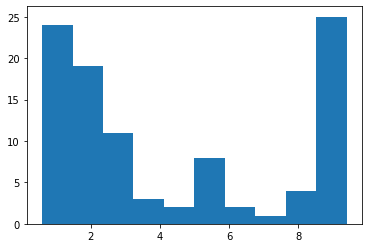

In [92]:
plt.hist(df["IC50Pred"])